In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from python2 import *
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [3]:
from proj1_helpers import *

In [4]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)


In [ ]:
y = (y+1)/2

## Do your thing crazy machine learning thing here :) ...

In [ ]:
tX4 = np.where(tX == -999, 0, tX)
weights, error = least_squares(y,tX)
tX3 = standardize(tX)
tx = np.c_[np.ones((y.shape[0], 1)), tX]
weigths4,error4 = least_squares(y,tx)
weights3, error3 = least_squares(y,tX3)
weights2, error2 = least_squares(y,tX2)
print(error3)
print(error2)
print(error4)

In [482]:
tX_new , y_new = balance_data_stupid (tX,y)
tX_new = np.where(tX_new == -999, 0, tX_new)

In [ ]:
t

In [491]:
tx_new = build_poly(tX_new,11)

In [498]:
weights, error = least_squares(y_new,tx_new)
loss_really(weights,y_new,tx_new)

0.48749810312022135

In [ ]:
s = np.hstack([np.random.choice(np.where(labels == )[0], n, replace=False)
                      for l in np.unique(labels)])

In [5]:
tX3 = np.where(tX == -999, 0, tX)

In [500]:
tx3 = build_poly(tX3,11)

In [ ]:
weights, error = least_squares(y,tx3)

In [460]:
loss_really(weights,y,tx3)

0.214288

In [ ]:
errors = []
y_pred  = np.zeros(len(y))
for i in [0,3,6,9,12,15,18,21,24,27]:
    print(i)
    tx_test = tX3[:,[i,i+1,i+2]]
    tx3 = build_poly(tx_test,8)
    weights, error = least_squares(y,tx3)
    y_pred = y_pred + predict_labels(weights, tx3)
    errors.append(loss_really(weights,y,tx3))
    

In [ ]:
tX3 = np.where(tX == -999, 0, tX)
tX4 = standardize(tX4)

In [ ]:
tx4 = build_poly(tX3,10)

In [ ]:
tx5 = build_poly(tX4,10)

In [ ]:
weights4, error4 = least_squares(y,tx4)
loss_really(weights4,y,tx4)

In [ ]:
weights5, error5 = least_squares(y,tx5)
loss_really(weights5,y,tx5)

In [ ]:
weights_r, error_r =  ridge_regression(y,tx5,0)
loss_really(weights_r,y,tx5)

In [ ]:
weights, error = least_squares(y,tx)
loss_really(weights,y,tx)

In [ ]:
col_1 = ((tX[:,0] == -999) + 0).reshape(-1,1)
col_4 = ((tX[:,4] == -999) + 0).reshape(-1,1)
col_23 = ((tX[:,23] == -999) + 0).reshape(-1,1)
np.sum(col_23)
tx_final = np.concatenate((tx3,col_1,col_4,col_23),1)


In [ ]:
weight, error = least_squares(y,tx_final)
loss_really(weight,y,tx_final)


In [ ]:
weights, error = least_squares(y,tx4)
loss_really(weights,y,tx4)

In [ ]:
gamma = 1
initial_w = np.zeros(tX.shape[1])

In [34]:
np.sum(y_new == 1)

85667

In [ ]:
calculate_loss_sigmoid(y,tX,w)

In [421]:
y_new = (y+1)/2
gamma = 1e-2
tX4 = standardize(tX3)
tx3 = build_poly(tX4,7)
tx3 = standardize(tx3,True)
w = np.zeros(tx3.shape[1])

In [432]:
gamma = 0.9

In [436]:
l, w = logistic_regression(y_new,tx3,w,40,gamma)
y_pred = predict_labels(w,tx3)
np.sum(y == y_pred)/len(y)

0.43291867743775636
0.4328330328202927
0.4327494149920157
0.4326676846986415


0.804364

In [434]:
y

array([ 1., -1., -1., ...,  1., -1., -1.])

In [336]:
np.sum(y == y_pred)/len(y)

0.79778

In [190]:
y_pred = sigmoid(np.dot(tx3, w))
y_test = predict_labels2(w,tx3)
why = y_pred[y_test != y]

[0.23048654 0.06031774 0.41442101 ... 0.38123919 0.3989019  0.10384807]


10876

In [128]:
def predict_labels2(weights, data):
    """Generates class predictions given weights, and a test data matrix"""
    y_pred = sigmoid(np.dot(data, weights))
    print(y_pred)
    y_pred[np.where(y_pred <= 0.5)] = -1
    y_pred[np.where(y_pred > 0.5)] = 1
    
    return y_pred

In [501]:
index = 0 
errors = []
weightss = []
for lambda_ in lambdas:
    index = index+1
    print(index)
    weights_r, error_r =  ridge_regression(y_new,tx_new,lambda_)
    errors.append(loss_really(weights_r,y,tx3))
    weightss.append(weights_r)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [476]:
tx_tr,tx_te,y_tr,y_te = split_data(tx_new, y_new, 0.9,0)

In [493]:
lambdas = np.logspace(-6,-5,num = 20)

In [494]:
index = 0 
errors = []
weightss = []
for lambda_ in lambdas:
    index = index+1
    print(index)
    weights_r, error_r =  ridge_regression(y_tr,tx_tr,lambda_)
    errors.append(loss_really(weights_r,y_te,tx_te))
    weightss.append(weights_r)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


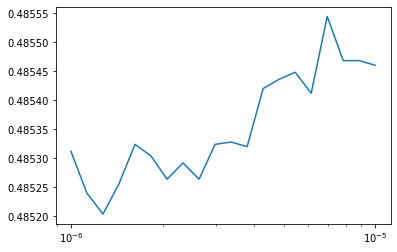

In [502]:
plt.semilogx(lambdas,errors)

In [779]:
weights = weightss[np.argmin(errors)]
np.argmin(errors)

2

In [504]:
loss_really(weights,y_te,tx_te)

ValueError: shapes (17133,391) and (331,) not aligned: 391 (dim 1) != 331 (dim 0)

## Generate predictions and save ouput in csv format for submission:

In [ ]:
t2 = np.zeros(30)
for i in range(30):
    t2[i] = np.sum(tX_test[:,i] == -999)

In [ ]:
tx_test = np.where(tX_test == -999, 0, tX_test)
tx_test = build_poly(tx_test,11)
col_1 = ((tX_test[:,0] == -999) + 0).reshape(-1,1)
col_4 = ((tX_test[:,4] == -999) + 0).reshape(-1,1)
col_23 = ((tX_test[:,23] == -999) + 0).reshape(-1,1)
tx_test_final = np.concatenate((tx_test,col_1,col_4,col_23),1)

In [413]:
tx_test = np.where(tX_test == -999, 0, tX_test)
tx_test = standardize(tx_test)
tx_test = build_poly(tx_test,7)
tx_test = standardize(tx_test,True)

In [32]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)


In [ ]:
tx_test = build_poly(tX_test,7)

In [ ]:
tX4_test = np.where(tX_test == -999, 0, tX_test)
tx4_test = build_poly(tX4_test,11)

In [438]:
OUTPUT_PATH = '../data/submission3.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(w, tx_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)